In [24]:
from utils import SocketReader

In [43]:
try:
    sock.close()
except:
    pass

sock = SocketReader("www.google.com", 80, 'tcp')

sock.connect()

In [44]:
message = b"""GET / HTTP/1.1
Host: www.google.com

"""
sock.send(message)

In [45]:
sock.read_line()

b'HTTP/1.1 200 OK\r\n'

In [46]:
sock.read_line()

b'Date: Thu, 13 Jun 2024 09:01:33 GMT\r\n'

In [29]:
content_length = None
chunked = False

while True:
    header = sock.read_line()
    print(header)
    if header == b'\r\n':
        break
    if header.lower().startswith(b'content-length:'):
        content_length = int(header.lower().split(':').strip())
        print('got content length', content_length)
    elif header.lower().startswith(b'transfer-encoding: chunked'):
        chunked = True
        print('got chunked')


b'Expires: -1\r\n'
b'Cache-Control: private, max-age=0\r\n'
b'Content-Type: text/html; charset=ISO-8859-1\r\n'
b"Content-Security-Policy-Report-Only: object-src 'none';base-uri 'self';script-src 'nonce-NrKLh2UmoKvmuJ--2Fvhqw' 'strict-dynamic' 'report-sample' 'unsafe-eval' 'unsafe-inline' https: http:;report-uri https://csp.withgoogle.com/csp/gws/other-hp\r\n"
b'Server: gws\r\n'
b'X-XSS-Protection: 0\r\n'
b'X-Frame-Options: SAMEORIGIN\r\n'
b'Set-Cookie: AEC=AQTF6Hzo4JVgjkM4_mejcXb3VaTBgX806dip5vTY30ubP9BqcpxeDNDI5jE; expires=Mon, 09-Dec-2024 19:14:53 GMT; path=/; domain=.google.com; Secure; HttpOnly; SameSite=lax\r\n'
b'Accept-Ranges: none\r\n'
b'Vary: Accept-Encoding\r\n'
b'Transfer-Encoding: chunked\r\n'
got chunked
b'\r\n'


In [30]:
body = b''

In [31]:
if chunked:
    print("reading chunks")
    length = sock.read_line()
    print("length line", length)
    l = int(length[:-2], 16)

reading chunks
length line b'4ef2\r\n'


In [32]:
if chunked:
    ch = sock.read_len(l)
    print("got chunk", len(ch), ch[:100])
    body += ch
    sock.read_line()

got chunk 20210 b'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="nl"><head><meta content'


In [33]:
while chunked:
    print("reading chunks")
    length = sock.read_line()
    print("length line", length)
    l = int(length[:-2], 16)

    ch = sock.read_len(l)
    print("got chunk", len(ch), ch[:100])
    body += ch
    sock.read_line()
    if l == 0:
        break

reading chunks
length line b'c0\r\n'
got chunk 192 b'||a.message==="Error loading script"||q>=l&&!m?!1:!0;if(!b)return null;q++;d=d||{};b=encodeURICompon'
reading chunks
length line b'8000\r\n'
got chunk 32768 b'c+="&srcpg="+b(google.sn)+"&jsr="+b(t.jsr)+\n"&bver="+b(t.bv);var f=a.lineNumber;f!==void 0&&(c+="&li'
reading chunks
length line b'1b4\r\n'
got chunk 436 b'ibute("data-ved")?f=a?G(a)||"":"":f=(f=\na.closest("[data-ved]"))?G(f)||"":"";f=f||"";if(a.hasAttribu'
reading chunks
length line b'0\r\n'
got chunk 0 b''


In [34]:
from IPython.core.display import display, HTML
display(HTML(body.decode("latin1")))

/tmp/ipykernel_2293133/449586190.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


,,Geavanceerd zoeken


In [35]:
message = b"""GET /search?q=http+2 HTTP/1.1
Host: www.google.com

"""
sock.send(message)

In [36]:
sock.read_line()

b'HTTP/1.1 200 OK\r\n'

In [37]:
content_length = None
chunked = False

while True:
    header = sock.read_line()
    print(header)
    if header == b'\r\n':
        break
    if header.lower().startswith(b'content-length:'):
        content_length = int(i.split(':').strip())
        print('got content length', content_length)
    elif header.lower().startswith(b'transfer-encoding: chunked'):
        chunked = True
        print('got chunked')


b'Content-Type: text/html; charset=ISO-8859-1\r\n'
b'Date: Wed, 12 Jun 2024 19:15:16 GMT\r\n'
b'Expires: -1\r\n'
b'Cache-Control: private, max-age=0\r\n'
b"Content-Security-Policy: object-src 'none';base-uri 'self';script-src 'nonce-WXz2f-qYcLgiwKKCohNUZA' 'strict-dynamic' 'report-sample' 'unsafe-eval' 'unsafe-inline' https: http:;report-uri https://csp.withgoogle.com/csp/gws/xsrp\r\n"
b'Server: gws\r\n'
b'X-XSS-Protection: 0\r\n'
b'X-Frame-Options: SAMEORIGIN\r\n'
b'Set-Cookie: AEC=AQTF6HzKVzYNxBlqIVo3wPbGPSSZIcvdwBRVM-xupchSzHkooVSswT76xw; expires=Mon, 09-Dec-2024 19:15:16 GMT; path=/; domain=.google.com; Secure; HttpOnly; SameSite=lax\r\n'
b'Accept-Ranges: none\r\n'
b'Vary: Accept-Encoding\r\n'
b'Transfer-Encoding: chunked\r\n'
got chunked
b'\r\n'


In [38]:
body = b''

In [39]:
while chunked:
    print("reading chunks")
    length = sock.read_line()
    print("length line", length)
    l = int(length[:-2], 16)

    ch = sock.read_len(l)
    print("got chunk", len(ch), ch[:100])
    body += ch
    sock.read_line()
    if l == 0:
        break

reading chunks
length line b'30e1\r\n'
got chunk 12513 b'<!doctype html><html lang="nl"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1'
reading chunks
length line b'96\r\n'
got chunk 150 b'down",function(a){if(a.keyCode===9){a=t;var b=u;if(a.classList)a.classList.add(b);else if(!r(a,b)){v'
reading chunks
length line b'4d2\r\n'
got chunk 1234 b'AoYTe";X();}).call(this);</script><div class="cOl4Id"><a href="/?sa=X&amp;ved=0ahUKEwjKisie49aGAxWYh'
reading chunks
length line b'154a\r\n'
got chunk 5450 b'<div id="main"><div><div class="KP7LCb"> <div class="bRsWnc"> <div class="N6RWV"> <div class="Pg70bf'
reading chunks
length line b'ac1\r\n'
got chunk 2753 b'(function(){var a=document.getElementById("st-toggle"),b=document.getElementById("st-card");a&&b&&a.'
reading chunks
length line b'eb6\r\n'
got chunk 3766 b'.Hk2yDb.KsR1A span{background-image:url(data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAACgAAAAoBAMAAA'
reading chunks
length line b'8000\r\n'
got chunk 32768 b'

/tmp/ipykernel_2293133/680056028.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML



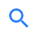
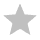
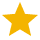
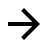

In [40]:
import re
from IPython.core.display import display, HTML
css_body_cleaner = re.compile(r'(<style>.*?)body\s*\{.+?\}(.*?</style>)')
display(HTML(re.sub(css_body_cleaner, r'\1\2', body.decode("latin1"))))

In [42]:
sock.close()